In [1]:
import pandas as pd
df = pd.read_csv("./data/cardio_train.csv",sep=";")

In [2]:
print(df.head())
print(df.shape)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0  110.0   80.0            1     1      0   
1   1  20228       1     156    85.0  140.0   90.0            3     1      0   
2   2  18857       1     165    64.0  130.0   70.0            3     1      0   
3   3  17623       2     169    82.0  150.0  100.0            1     1      0   
4   4  17474       1     156    56.0  100.0   60.0            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
(70000, 13)


In [3]:
df = df.drop(columns=['id'])
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,69993.000000,69999.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.842241,96.632795,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,153.998803,188.472824,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [5]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
# sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
# print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

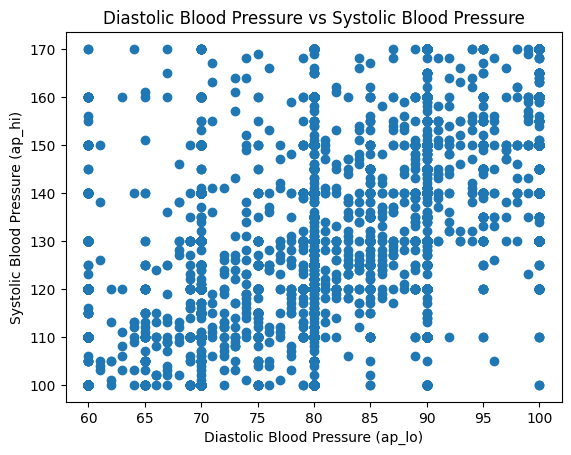

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['ap_lo'], df['ap_hi'])
plt.xlabel('Diastolic Blood Pressure (ap_lo)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.title('Diastolic Blood Pressure vs Systolic Blood Pressure')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

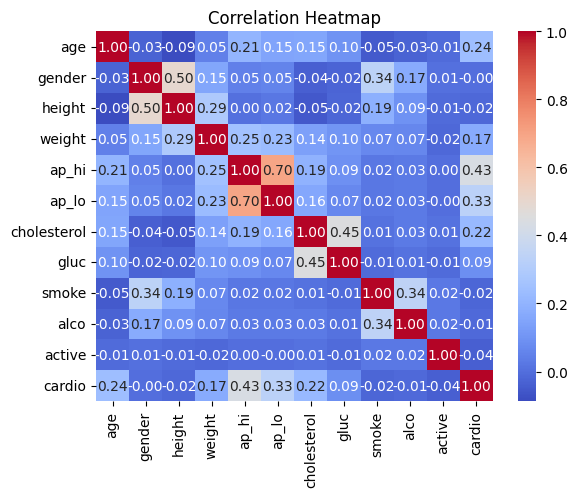

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')

In [8]:
# Identify missing values
print("Missing values in each column:")
df.isnull().sum()


Missing values in each column:


age            0
gender         0
height         0
weight         0
ap_hi          7
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
4607   15281       1     165    78.0    NaN   80.0            2     1      0   
16021  22108       2     161    90.0    NaN   70.0            1     1      0   
20536  15581       1     153    54.0    NaN   70.0            1     1      0   
23988  18301       1     162    74.0    NaN   90.0            1     1      0   
25240  14711       2     168    50.0    NaN   80.0            2     1      0   
35040  23325       2     168    59.0    NaN   80.0            1     1      0   
46627  23646       2     160    59.0    NaN   80.0            1     1      0   

       alco  active  cardio  
4607      0       1       0  
16021     0       1       0  
20536     0       1       0  
23988     0       1       1  
25240     0       0       1  
35040     0       1       1  
46627     0       0       0  


In [10]:
# Handling missing values by dropping rows with any missing values
df_cleaned = df.dropna()

# Handling missing values by filling with the mean  
# df_filled = df.fillna(df.mean())


In [11]:
# Print missing values after cleaning
print("Missing values after cleaning:")
df_cleaned.isnull().sum()

Missing values after cleaning:


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df_cleaned

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,21074,1,165,80.0,150.0,80.0,1,1,0,0,1,1
69995,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

x = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model 1: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)

========Logistic Regression========
Confusion Matrix:
[[5314 1422]
 [2151 4352]]


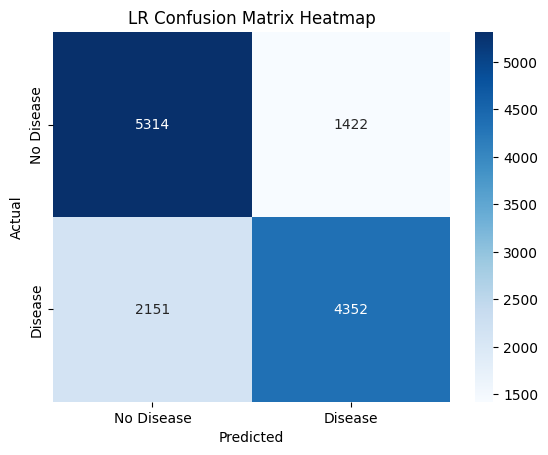

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
lr_cm = confusion_matrix(y_test, y_pred)
print("========Logistic Regression========")
print("Confusion Matrix:")
print(lr_cm)
import seaborn as sns
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LR Confusion Matrix Heatmap')
plt.show()

In [17]:
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"LR Accuracy: {lr_accuracy}")
lr_precision = precision_score(y_test, y_pred)
print(f"LR Precision: {lr_precision}")
lr_recall = recall_score(y_test, y_pred)
print(f"LR Recall: {lr_recall}")

LR Accuracy: 0.7301155676410604
LR Precision: 0.7537235885001732
LR Recall: 0.6692295863447639


# Feature Selection for Model 1: Univariate Selection

In [18]:
from sklearn.feature_selection import f_classif

fc = f_classif(x_train, y_train)
sc_scores_sorted = sorted(zip(fc[0], df.columns[:-1]), reverse=True)

print("ANOVA F-test Scores:")
for score, feature in sc_scores_sorted:
    print(f"{feature}: {score:.4f}")


ANOVA F-test Scores:
ap_hi: 11913.2730
ap_lo: 6421.5809
age: 3055.7515
cholesterol: 2704.3430
weight: 1545.2504
gluc: 421.9149
active: 70.7710
smoke: 19.8594
height: 19.7298
alco: 6.2821
gender: 0.2922


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

f_selector = SelectKBest(f_classif, k=6)
x_fbest = f_selector.fit_transform(x_train, y_train)

print("Selected features using ANOVA F-test:")
for i in f_selector.get_support(indices=True):
    print(df.columns[i])

Selected features using ANOVA F-test:
age
weight
ap_hi
ap_lo
cholesterol
gluc


In [20]:
from sklearn.linear_model import LogisticRegression
lr_clf_fbest = LogisticRegression(random_state=42)
lr_clf_fbest.fit(x_fbest, y_train)
y_pred_fbest = lr_clf_fbest.predict(f_selector.transform(x_test))



========Logistic Regression with Selected Features========
Confusion Matrix:
[[5321 1415]
 [2189 4314]]


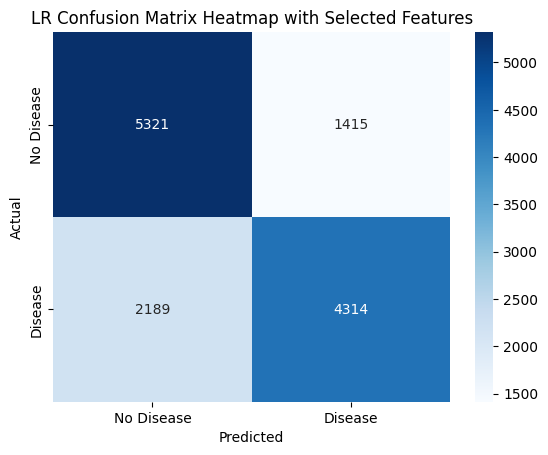

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

lr_cm_fbest = confusion_matrix(y_test, y_pred_fbest)
print("========Logistic Regression with Selected Features========")
print("Confusion Matrix:")
print(lr_cm_fbest)
sns.heatmap(lr_cm_fbest, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LR Confusion Matrix Heatmap with Selected Features')
plt.show()

In [22]:
lf_accuracy_fbest = accuracy_score(y_test, y_pred_fbest)
print(f"LR Accuracy with Selected Features: {lf_accuracy_fbest}")
lf_precision_fbest = precision_score(y_test, y_pred_fbest)
print(f"LR Precision with Selected Features: {lf_precision_fbest}")
lf_recall_fbest = recall_score(y_test, y_pred_fbest)
print(f"LR Recall with Selected Features: {lf_recall_fbest}")

LR Accuracy with Selected Features: 0.7277740010574817
LR Precision with Selected Features: 0.7530109966835399
LR Recall with Selected Features: 0.6633861294787021


# Model 2: Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

========Random Forest========
Confusion Matrix:
[[4939 1797]
 [1960 4543]]


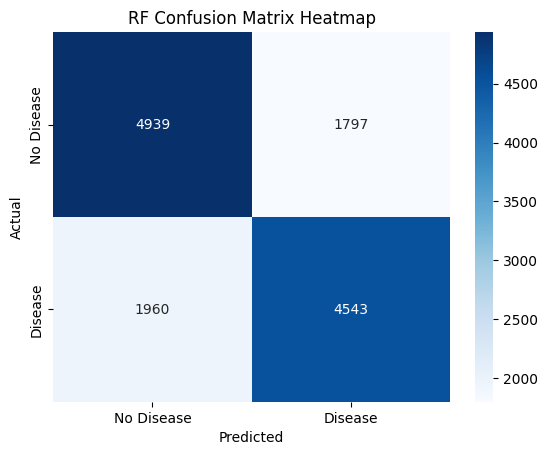

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred_rf = rf_clf.predict(x_test)
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("========Random Forest========")
print("Confusion Matrix:")
print(rf_cm)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix Heatmap')
plt.show()

In [25]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RF Accuracy: {rf_accuracy}")
rf_precision = precision_score(y_test, y_pred_rf)
print(f"RF Precision: {rf_precision}")
rf_recall = recall_score(y_test, y_pred_rf)
print(f"RF Recall: {rf_recall}")

RF Accuracy: 0.7162172369514314
RF Precision: 0.7165615141955836
RF Recall: 0.6986006458557589


# Feature Selection for Model 2: Model-Based Selection

In [26]:
feat_labels = df_cleaned.columns[:-1]

In [27]:
import numpy as np

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) age                            0.318236
 2) weight                         0.178858
 3) height                         0.161579
 4) ap_hi                          0.160614
 5) ap_lo                          0.080932
 6) cholesterol                    0.038222
 7) gluc                           0.016621
 8) gender                         0.015721
 9) active                         0.013007
10) smoke                          0.008841
11) alco                           0.007369


In [28]:
threshold = 0.03
x_selected = x_train[:, importances > threshold]
x_selected.shape

(52954, 6)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_mb = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf_mb.fit(x_selected, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

========Random Forest with Feature Importance========
Confusion Matrix:
[[4871 1865]
 [2001 4502]]


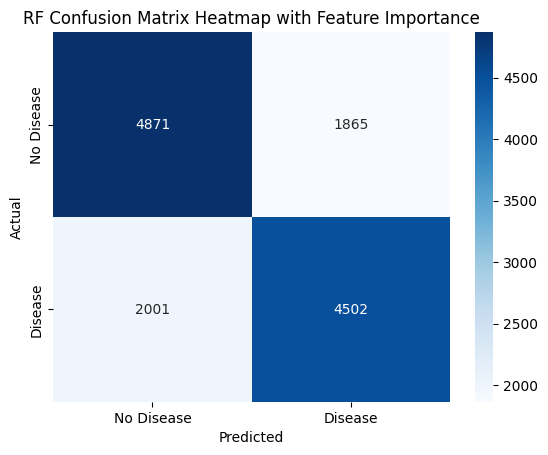

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred_rf_mb = rf_clf_mb.predict(x_test[:, importances > threshold])
rf_cm_mb = confusion_matrix(y_test, y_pred_rf_mb)
print("========Random Forest with Feature Importance========")
print("Confusion Matrix:")
print(rf_cm_mb)
sns.heatmap(rf_cm_mb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix Heatmap with Feature Importance')
plt.show()

In [31]:
rf_accuracy_mb = accuracy_score(y_test, y_pred_rf_mb)
print(f"RF Accuracy with Feature Importance: {rf_accuracy_mb}")
rf_precision_mb = precision_score(y_test, y_pred_rf_mb)
print(f"RF Precision with Feature Importance: {rf_precision_mb}")
rf_recall_mb = recall_score(y_test, y_pred_rf_mb)
print(f"RF Recall with Feature Importance: {rf_recall_mb}")

RF Accuracy with Feature Importance: 0.7079839867059445
RF Precision with Feature Importance: 0.7070833987749332
RF Recall with Feature Importance: 0.6922958634476396
